In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("Defense2021.csv")

In [3]:
df.head()

,Rk.,Year,Team,PA,Total Shifts,%,RHH - PA,RHH - Shifts,RHH - %,RHH - wOBA,LHH - PA,LHH - Shifts,LHH - %,LHH - wOBA
0,1,2021,Orioles,6228,1604,25.8,4012,378,9.4,0.323,2216,1226,55.3,0.332
1,2,2021,D-backs,6223,1974,31.7,3682,832,22.6,0.375,2541,1142,44.9,0.341
2,3,2021,Cubs,6176,2177,35.2,3347,466,13.9,0.381,2829,1711,60.5,0.365
3,4,2021,Reds,6169,1584,25.7,3458,260,7.5,0.420,2711,1324,48.8,0.315
4,5,2021,Tigers,6154,2342,38.1,3804,760,20.0,0.346,2350,1582,67.3,0.316


In [4]:
df.columns

Index(['Rk.', 'Year', 'Team', 'PA', 'Total Shifts', '%', 'RHH - PA',
       'RHH - Shifts', 'RHH - %', 'RHH - wOBA', 'LHH - PA', 'LHH - Shifts',
       'LHH - %', 'LHH - wOBA'],
      dtype='object')

In [5]:
display(df['RHH - wOBA'].mean())
display(df['LHH - wOBA'].mean())

0.3503333333333334

0.31660000000000005

In [6]:
display(df['RHH - %'].mean())
display(df['LHH - %'].mean())

16.196666666666665

52.80666666666668

In the two cells above, we see that teams shifted over three times more often in 2021 against left-handed batters compared to right-handed batters(16.2% against right-handed hitters and 52.8% against left-handed hitters). In addition, we see that while the wOBA values for both right- and left-handed hitters were relatively close, left handed hitters had a slightly higher wOBA overall (0.350 compared to 0.317).

In [7]:
TopShifters = df.sort_values(by = "%", ascending = False)
TopShifters.head()

,Rk.,Year,Team,PA,Total Shifts,%,RHH - PA,RHH - Shifts,RHH - %,RHH - wOBA,LHH - PA,LHH - Shifts,LHH - %,LHH - wOBA
23,24,2021,Dodgers,5905,3165,53.6,3338,1403,42.0,0.293,2567,1762,68.6,0.277
28,29,2021,Mets,5764,2891,50.2,3263,1469,45.0,0.320,2501,1422,56.9,0.311
12,13,2021,Astros,6048,2792,46.2,3555,761,21.4,0.290,2493,2031,81.5,0.312
26,27,2021,Braves,5852,2276,38.9,3582,1197,33.4,0.319,2270,1079,47.5,0.323
4,5,2021,Tigers,6154,2342,38.1,3804,760,20.0,0.346,2350,1582,67.3,0.316


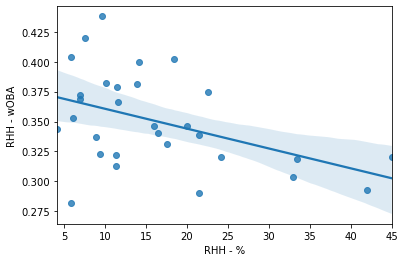

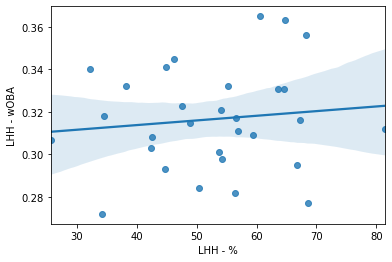

In [8]:
sns.regplot(
    data=df,
    x= 'RHH - %',
    y= 'RHH - wOBA'
)
plt.show()
plt.close()
sns.regplot(
    data=df,
    x= 'LHH - %',
    y= 'LHH - wOBA'
)
plt.show()  

Upon graphing the relationship between shift% and opposing wOBA for right- and left-handed batters, we see a noticable negative correlation between shift% against right-handed batters and their opposing wOBA, while we see no such correlation for left-handed batters, even though teams shift 3 times more often against left-handed batters. To explore this further, we will add additional years to increase sample size.

In [9]:
pd.set_option('display.max_rows', None)
df_list = []
for year in range(2017, 2022, 2):
    #print(year)
    excelstring=f"Defense{year}.csv"
    print(excelstring)
    
    year_df = pd.read_csv(excelstring)
#     print(year)
#     display(year_df)
    df_list.append(year_df)

df_list.append(df)
master_df = pd.concat(df_list, ignore_index=True, axis=0)
display(master_df.head()) 

Defense2017.csv
Defense2019.csv
Defense2021.csv


,Rk.,Year,Team,PA,Total Shifts,%,RHH - PA,RHH - Shifts,RHH - %,RHH - wOBA,LHH - PA,LHH - Shifts,LHH - %,LHH - wOBA
0,1,2017,Astros,6074,2085,34.3,3439,763,22.2,0.344,2635,1322,50.2,0.307
1,2,2017,Rays,6041,1770,29.3,3615,932,25.8,0.342,2426,838,34.5,0.296
2,3,2017,Brewers,6104,1523,25.0,3335,651,19.5,0.363,2769,872,31.5,0.352
3,4,2017,White Sox,6123,1185,19.4,3667,320,8.7,0.340,2456,865,35.2,0.364
4,5,2017,Orioles,6252,1158,18.5,3727,377,10.1,0.412,2525,781,30.9,0.340


In [10]:
display(master_df['RHH - wOBA'].mean())
display(master_df['LHH - wOBA'].mean())

0.3567500000000002

0.3253916666666667

In [11]:
display(master_df['RHH - %'].mean())
display(master_df['LHH - %'].mean())

12.967500000000001

42.46416666666665

After adding two more additional years of data, we see that the difference between shift% for right- and left- handed batters is even more contrasting(nearly 4x more often against left handed batters). However, upon calculating the mean wOBA for right- and left- handed batters, we notice the opposite trend from the values calculated from the 2021 data; here, right-handed batters have a slighty higher wOBA as compared to left-handed batters (0.367 to 0.325). 

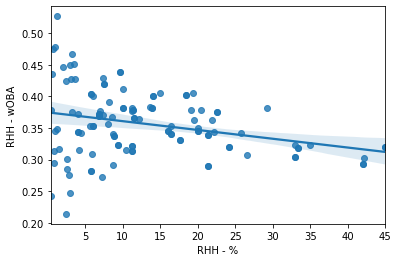

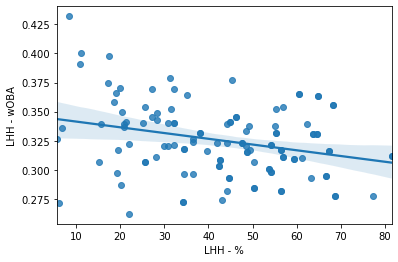

In [13]:
sns.regplot(
    data=master_df,
    x= 'RHH - %',
    y= 'RHH - wOBA'
)
plt.show()
plt.close()
sns.regplot(
    data=master_df,
    x= 'LHH - %',
    y= 'LHH - wOBA'
)
plt.show()    

In [14]:
top_shifters_RH = master_df.loc[master_df['RHH - %'] > 25.0]
top_shifters_LH = master_df.loc[master_df['LHH - %'] > 25.0]
top_shifters = [top_shifters_RH, top_shifters_LH]
for df in top_shifters:
    display(len(df))

14

98

Upon plotting the larger data set, we actually see very similar trends for right- and left- handed batters; as shift% increases, opposing wOBA declines. However, we can also clearly see the disparity in shift%; across 3 seasons, only there were only 14 instances where a team shifted more than 25% of the time against RHH in a season, while there were 98 instances where a team shifted more than 25% of the time.